In [64]:
# import libraries
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 

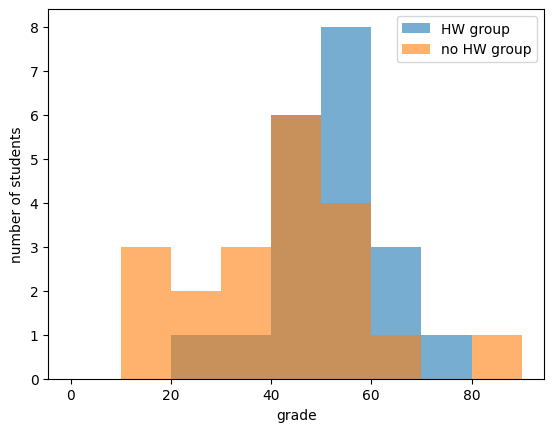

In [65]:
# example 1 power of permutation test

group_HW = np.array([24,61,59,46,43,53,43,44,52,43,57,49,58,67,62,57,56,33,71,54])
group_noHW = np.array([42,33,46,37,62,20,43,41,10,42,53,48,55,19,17,55,37,85,26,54])


plt.hist(group_HW,bins = np.arange(0,100,10), alpha = 0.6, label = 'HW group')
plt.hist(group_noHW,bins = np.arange(0,100,10), alpha = 0.6, label = 'no HW group')
plt.xlabel('grade')
plt.ylabel('number of students')
plt.legend()
plt.show()


p value = 0.015. p < α


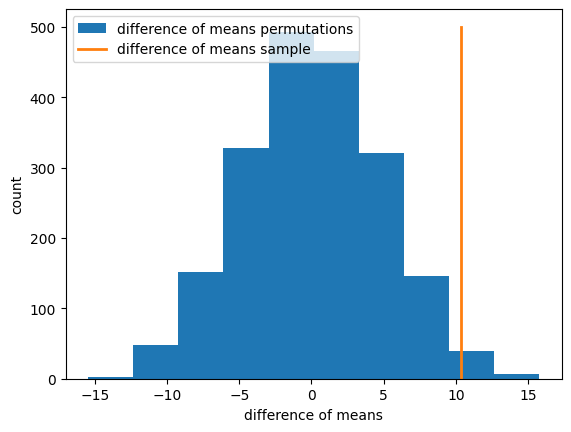

In [66]:
# example 1 significance and power of the permutation test

diff_mean_sample = group_HW.mean()- group_noHW.mean()

both_groups = np.concatenate((group_HW, group_noHW))

label = np.concatenate(([1]*len(group_HW),[2]*len(group_HW)))

num_perms = 2000
groups_perm = np.zeros((len(both_groups),num_perms))
for i in range(num_perms):
  groups_perm[:,i] = np.random.choice(both_groups, len(both_groups), replace=False)

group1_perm = groups_perm[label==1,:]
group2_perm = groups_perm[label==2,:]

diff_mean_perm = group1_perm.mean(axis=0)-group2_perm.mean(axis=0)

p = sum(diff_mean_perm>=diff_mean_sample)/num_perms
alpha = 0.05
print('p value = {}. p {sign} \u03B1'.format(round(p,4), sign='<' if p<alpha else '>='))

plt.hist(diff_mean_perm, label='difference of means permutations')
plt.plot([diff_mean_sample,diff_mean_sample], [0,500], lw=2, label='difference of means sample')
plt.xlabel('difference of means')
plt.ylabel('count')
plt.legend(loc = 'upper left')
plt.show()


In [67]:
# example 1 significance and power of the permutation test

mean1,mean2 = group_HW.mean(),group_noHW.mean()
sd1,sd2 = group_HW.std(ddof=1),group_noHW.std(ddof=1)
N1,N2 = len(group_HW),len(group_noHW)

alpha,num_rep = 0.05,500
p_rep = np.zeros((num_rep,))
for n in range(num_rep):
  group1_rep = stats.norm.rvs(mean1,sd1,size = (N1,))
  group2_rep = stats.norm.rvs(mean2,sd2,size = (N2,))

  # permutation test
  diff_mean_rep = group1_rep.mean()- group2_rep.mean()
  both_groups_rep = np.concatenate((group1_rep, group2_rep))
  groups_perm = np.zeros((len(both_groups),num_perms))
  for i in range(num_perms):
      groups_perm[:,i] = np.random.choice(both_groups_rep, len(both_groups_rep), replace=False)
  group1_rep_perm = groups_perm[label==1,:]
  group2_rep_perm = groups_perm[label==2,:]
  diff_mean_rep__perm = group1_rep_perm.mean(axis=0)-group2_rep_perm.mean(axis=0)

  p_rep[n] = sum(diff_mean_rep__perm>=diff_mean_rep)/num_perms

power_perm_test = sum(p_rep<alpha)/num_rep*100

print('power of the permutations test = {}%'.format(round(power_perm_test)))

power of the permutations test = 70%


In [68]:
# example 1 significance and power of the t-test

diff_mean_sample = group_HW.mean()- group_noHW.mean()

var1,var2 = group_HW.var(ddof=1),group_noHW.var(ddof=1)
N1,N2 = len(group_HW),len(group_noHW)
se_comb = (var1/N1 + var2/N2)**0.5
df = N1+N2-2

t_stat = diff_mean_sample/se_comb
p = 1-stats.t.cdf(abs(t_stat),df)
 
print('p value = {}. p {sign} \u03B1'.format(round(p,4), sign='<' if p<alpha else '>='))


p value = 0.0167. p < α


In [73]:
# example 1 significance and power of the t-test

mean1,mean2 = group_HW.mean(),group_noHW.mean()
sd1,sd2 = group_HW.std(ddof=1),group_noHW.std(ddof=1)
N1,N2 = len(group_HW),len(group_noHW)

alpha,num_rep = 0.05,500
p_rep = np.zeros((num_rep,))

group1_rep = stats.norm.rvs(mean1,sd1,size = (N1,num_rep))
group2_rep = stats.norm.rvs(mean2,sd2,size = (N2,num_rep))

# t test
diff_mean_rep = group1_rep.mean(axis=0) - group2_rep.mean(axis=0)
var1_rep,var2_rep = group1_rep.var(axis=0,ddof=1),group2_rep.var(axis=0,ddof=1)
se_comb_rep = (var1_rep/N1 + var2_rep/N2)**0.5

t_stat_rep = diff_mean_rep/se_comb_rep
p_rep = 1-stats.t.cdf(abs(t_stat_rep),df)     

power_t_test = sum(p_rep<alpha)/num_rep*100

print('power of the t-test = {}%'.format(round(power_t_test)))


power of the t-test = 72%


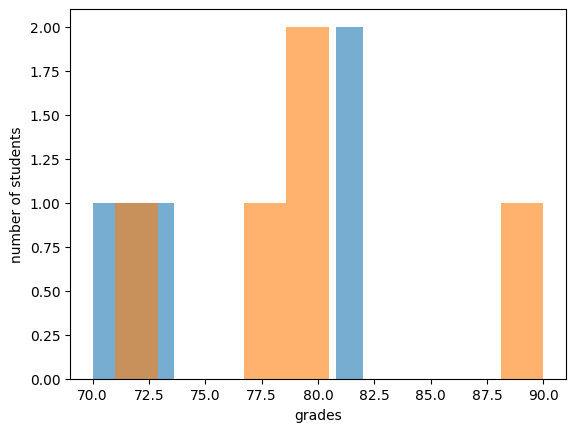

sample mean difference = -4.0
p value = 0.1724. p >= α


In [74]:
# example 2 preliminary power

exam = np.array([82,72,73,70,82])
semester = np.array([80,71,78,80,90])

plt.hist(exam, alpha = 0.6, label = 'grades of the students that studied before exam')
plt.hist(semester, alpha = 0.6, label = 'grades of the students that studied throughout the semester')
plt.xlabel('grades')
plt.ylabel('number of students')
plt.show()

N = len(exam)

mean_diff_sample = exam.mean()-semester.mean()
print('sample mean difference = {}'.format(mean_diff_sample))

se_comb = (exam.var(ddof=1)/N+semester.var(ddof=1)/N)**0.5

p = 1-stats.t.cdf(abs(mean_diff_sample/se_comb),2*N-2)

print('p value = {}. p {sign} \u03B1'.format(round(p,4), sign='<' if p<alpha else '>='))


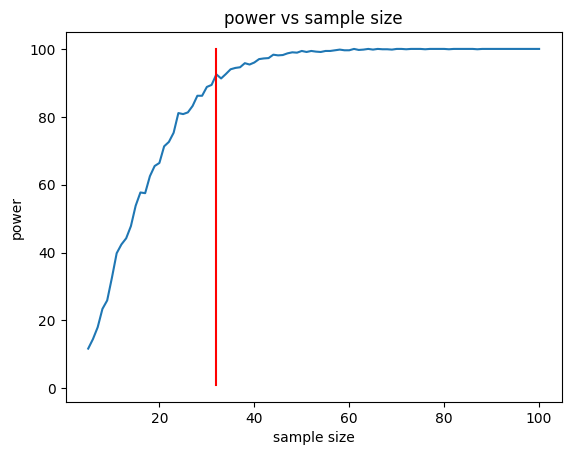

wanted sample size = 32


In [78]:
# example 2 preliminary power
# find N to get wanted power

mean1,mean2 = exam.mean(),semester.mean()
sd1,sd2 = exam.std(ddof=1),semester.std(ddof=1)
N_all = np.arange(5,101) 

power_N = np.zeros((len(N_all),))
num_reps = 1000

for n in range(len(N_all)):
  n_sample = N_all[n]
  exam_rep = stats.norm.rvs(mean1,sd1, size = (n_sample,num_reps)) 
  semester_rep = stats.norm.rvs(mean2,sd2, size = (n_sample,num_reps)) 

  diff_mean_rep = exam_rep.mean(axis=0) - semester.mean(axis=0)
  var1_rep,var2_rep = exam_rep.var(axis=0, ddof=1),semester.var(axis=0, ddof=1)
  se_comb_rep = (var1_rep/n_sample + var2_rep/n_sample)**0.5

  t_stat_rep = diff_mean_rep/se_comb_rep
  p_rep = 1-stats.t.cdf(abs(t_stat_rep),2*n_sample-2) 

  power_N[n] = sum(p_rep<alpha)/num_reps*100  

# find n with 90% power for significance alpha 0.05
wanted_power = 90
N_all_bigger_than_90 = N_all[power_N-wanted_power > 0]
wanted_sample_size = N_all_bigger_than_90[0]

plt.plot(N_all, power_N)
plt.plot([wanted_sample_size,wanted_sample_size],[1,100], color = 'red')
plt.xlabel('sample size')
plt.ylabel('power')
plt.title('power vs sample size')
plt.show()

print('wanted sample size = {}'.format(wanted_sample_size))

bootstrap p-value = 0.122


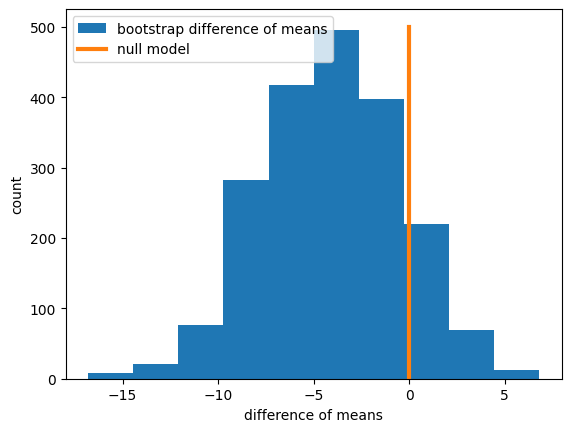

In [79]:
# bootstrap 
# significance

num_boot = 2000

exam_boot = np.random.choice(exam, size = (N,num_boot))
semester_boot = np.random.choice(semester, size = (N,num_boot))
boot_mean_diff = exam_boot.mean(axis=0)-semester_boot.mean(axis=0)

p_value = sum(boot_mean_diff>0)/num_boot
print('bootstrap p-value = {}'.format(round(p_value,4)))

plt.hist(boot_mean_diff, label = 'bootstrap difference of means')
plt.plot([0,0],[0,500], lw=3, label = 'null model')
plt.xlabel('difference of means')
plt.ylabel('count')
plt.legend()
plt.show()


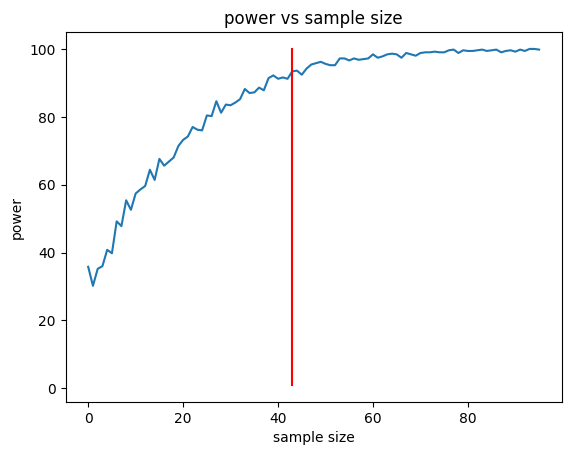

wanted sample size = 43


In [59]:
# bootstrap 
# example 2 preliminary power
# find N to get wanted power

mean1,mean2 = exam.mean(),semester.mean()
sd1,sd2 = exam.std(ddof=1),semester.std(ddof=1)
N_all = np.arange(5,101) 

power_N = np.zeros((len(N_all),))
num_reps = 500
num_boot = 1000
p_rep = np.zeros((num_reps,))

for n in range(len(N_all)):
  n_sample = N_all[n]
  for rep in range(num_reps):
    exam_n_rep = stats.norm.rvs(mean1,sd1, size = (n_sample,)) 
    semester_n_rep = stats.norm.rvs(mean2,sd2, size = (n_sample,)) 

    exam_rep_boot = np.random.choice(exam_n_rep, size = (n_sample,num_boot))
    semester_rep_boot = np.random.choice(semester_n_rep, size = (n_sample,num_boot))
    boot_rep_mean_diff = exam_rep_boot.mean(axis=0)-semester_rep_boot.mean(axis=0)

    p_rep[rep] = sum(boot_rep_mean_diff>0)/num_boot

  power_N[n] = sum(p_rep<alpha)/num_reps*100  

# find n with 90% power
wanted_power = 90
diff_array = N_all[power_N-wanted_power > 0]
wanted_sample_size = diff_array[0]

plt.plot(np.array(range(len(N_all))), power_N)
plt.plot([wanted_sample_size,wanted_sample_size],[1,100], color = 'red')
plt.xlabel('sample size')
plt.ylabel('power')
plt.title('power vs sample size')
plt.show()

print('wanted sample size = {}'.format(wanted_sample_size))



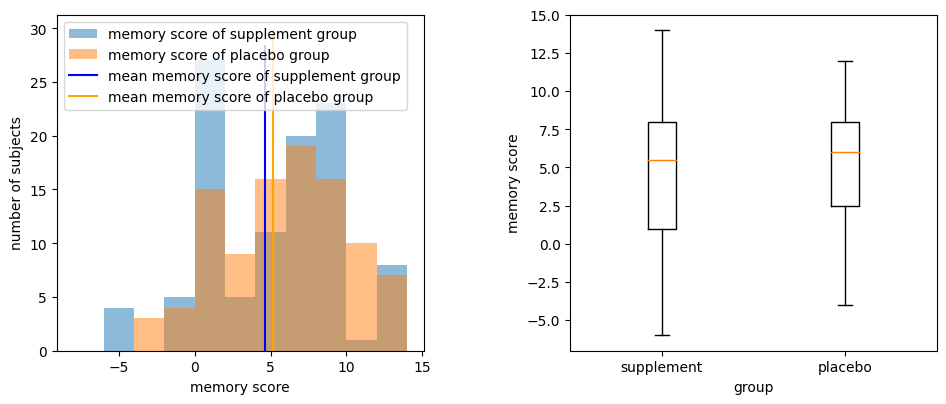

In [60]:
# example 3 

url = 'https://raw.githubusercontent.com/opherdonchin/StatisticalComputationAndAnalysis/main/Data/memory.csv'
data = pd.read_csv(url)

# present data

supplement = data.Gingko
placebo = data.Placebo
placebo = placebo[np.logical_not(np.isnan(placebo))]

supplement_mean = supplement.mean()
placebo_mean = placebo.mean()

fig, ax = plt.subplots(1,2)

bin_edges = np.arange(-8,16,2)
ax[0].hist(supplement, bins = bin_edges, alpha = 0.5, label = 'memory score of supplement group')
ax[0].hist(placebo, bins = bin_edges, alpha = 0.5, label = 'memory score of placebo group')
ax[0].plot([supplement_mean,supplement_mean], ax[0].get_ylim(), color = 'blue', label = 'mean memory score of supplement group')
ax[0].plot([placebo_mean,placebo_mean], ax[0].get_ylim(), color = 'orange', label = 'mean memory score of placebo group')
ax[0].set_xlabel('memory score')
ax[0].set_ylabel('number of subjects')
ax[0].legend(loc='upper left')

ax[1].boxplot([supplement, placebo], positions = (1,2))
ax[1].set_xticks((1,2), ['supplement','placebo'])
ax[1].set_xlabel('group')
ax[1].set_ylabel('memory score')
fig.subplots_adjust(bottom=0.2, right=1.5, top=0.9, wspace=0.4, hspace=0.4)
plt.show()


In [61]:
# two one sided t-tests 

delta = 1

sample_mean_diff = supplement_mean-placebo_mean

supplement_var = supplement.var(ddof=1)
placebo_var = placebo.var(ddof=1)
supplement_N = len(supplement)
placebo_N = len(placebo)
se_comb = (supplement_var/supplement_N + placebo_var/placebo_N)**0.5

df = supplement_N+placebo_N-2

# t-test side 1
t_stat1 = (sample_mean_diff-delta)/se_comb
p1 = 1-stats.t.cdf(abs(t_stat1),df)

# t-test side 2
t_stat2 = (sample_mean_diff+delta)/se_comb
p2 = 1-stats.t.cdf(abs(t_stat2),df)

print('p1 = {}, p2 = {}'.format(round(p1,4),round(p2,4)))

p1 = 0.0052, p2 = 0.2374


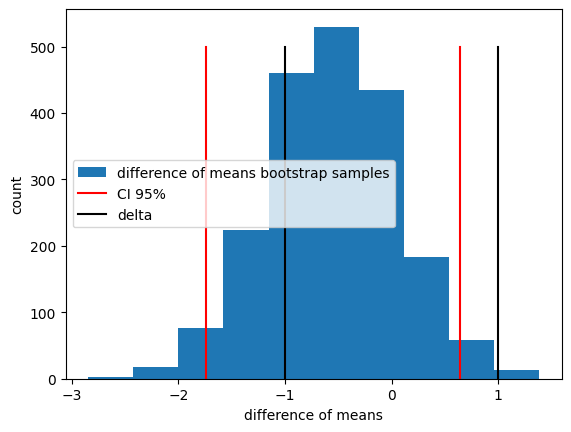

In [62]:
# bootstrap

num_boot = 2000

supplement_boot = np.random.choice(supplement, size = (supplement_N,num_boot))
placebo_boot = np.random.choice(placebo, size = (supplement_N,num_boot))

mean_diff_boot = supplement_boot.mean(axis=0)-placebo_boot.mean(axis=0)

ci95_boot = np.percentile(mean_diff_boot, [2.5,97.5])

plt.hist(mean_diff_boot, label = 'difference of means bootstrap samples')
plt.plot([ci95_boot[0],ci95_boot[0]], [0,500], color = 'red', label = 'CI 95%')
plt.plot([ci95_boot[1],ci95_boot[1]], [0,500], color = 'red')
plt.plot([delta,delta], [0,500], color = 'black', label = 'delta')
plt.plot([-delta,-delta], [0,500], color = 'black')
plt.xlabel('difference of means')
plt.ylabel('count')
plt.legend()
plt.show()
